In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/food_energy_detection/requeriment.txt" ./requeriment.txt

In [3]:
!pip install -r requeriment.txt
!pip install "pillow<7.0.0"

     |████████████████████████████████| 591.8MB 23kB/s 
     |████████████████████████████████| 61kB 11.3MB/s 
     |████████████████████████████████| 92kB 14.7MB/s 
     |████████████████████████████████| 163kB 63.8MB/s 
     |████████████████████████████████| 81kB 14.8MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26310 sha256=f73d7e2a426ee2faa24bff06765e62d625dfb1454e8cbca4dcd631ab671a88ea
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built typing
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
  Found existing installation: Flask 1.1.2
    Uninstalling Flask-1.1.2:
      Successfully uninstalled Flask-1.1.2
  Found existing installation: fast

     |████████████████████████████████| 2.1MB 7.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [1]:
import pandas as pd
import requests
import glob
from io import BytesIO
import numpy as np
import os
import shutil
import pprint
import json

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
!tar -xf "/content/drive/MyDrive/food_energy_detection/food-110.tar.gz" -C /content/

In [4]:
!ls ./images | head -n 5

apple_pie
baby_back_ribs
baklava
barbecue
bean_curd


read the images 

In [10]:
path = Path("images")

In [11]:
tfms = get_transforms(max_rotate=10,
                      max_zoom=1.1,
                      max_lighting=None,
                      max_warp=0.2,
                      xtra_tfms=[
                          brightness(change=(0.5-0.2, 0.5+0.2), p=0.75),
                          contrast(scale=(1-0.4, 1+0.2), p=0.75),
                          squish(scale=(1-0.3, 1+0.5), p=0.75),
                          skew(direction=(0, 7), magnitude=random.randint(0,6)/10, p=0.75),]
                      )

In [12]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=tfms, size=256, num_workers=8, bs=64).normalize(imagenet_stats)

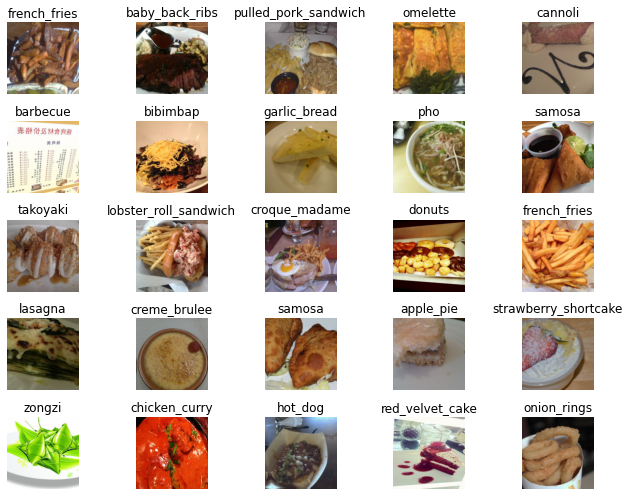

In [13]:
data.show_batch(row=3, figsize=(9, 7))

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'barbecue',
  'bean_curd',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fired_rice',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_chicken',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'glutinous_rice_balls',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  

## Train Model

# Initialize Rest

In [15]:
learn = create_cnn(data, models.resnet101, metrics=error_rate,pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:04<00:00, 37841402.35it/s]


In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
torch.backends.cudnn.benchmark = False

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


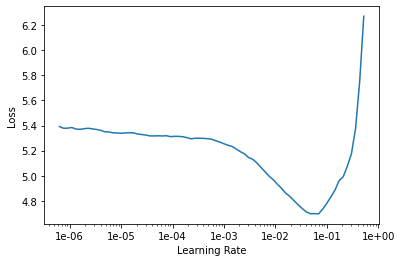

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
#learn = create_cnn(data, models.resnet34, metrics=error_rate, model_dir="../../prod")
#learn.model = torch.nn.DataParallel(learn.model)


In [19]:
lr = 1e-2

In [20]:
learn.fit_one_cycle(8 , lr)

epoch,train_loss,valid_loss,error_rate
1,2.213305,2.117337,0.541496
2,2.292334,2.453229,0.590502
3,2.094951,2.221427,0.559096
4,1.827066,1.690473,0.444090
5,1.531275,1.579741,0.411774
6,1.292105,1.171195,0.314823
7,1.042547,1.054454,0.283113
8,0.956606,1.041258,0.279169


In [ ]:
!cp -r "/content/drive/MyDrive/food_energy_detection/modeles_res101" ./images/models

In [21]:
model_name="sqeenzenet_res101_tsfmed"

In [22]:
learn.save(f'{model_name}-stage-1')

In [23]:
!cp -r  ./images/models "/content/drive/MyDrive/food_energy_detection/modeles_res101_tsfmed"

In [24]:
while True:
    pass

KeyboardInterrupt: ignored

In [25]:
learn.load(f'{model_name}-stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (26365 items)
[Category edamame, Category edamame, Category edamame, Category edamame, Category edamame]...
Path: images
x: ImageItemList (26365 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512)]...
Path: images;

Valid: LabelList
y: CategoryList (6591 items)
[Category beef_carpaccio, Category waffles, Category chocolate_cake, Category pork_chop, Category tiramisu]...
Path: images
x: ImageItemList (6591 items)
[Image (3, 512, 510), Image (3, 512, 512), Image (3, 382, 512), Image (3, 341, 512), Image (3, 512, 341)]...
Path: images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4

In [27]:
learn.unfreeze()


In [28]:
learn.lr_find(start_lr=1e-09, end_lr=1e-3)

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


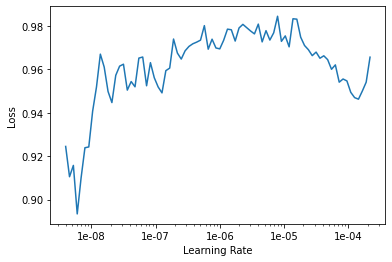

In [29]:
learn.recorder.plot(skip_end=10)


In [30]:
learn.fit_one_cycle(5, max_lr=slice(1e-8,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.966132,1.043688,0.280686
2,0.959250,1.033300,0.278107
3,0.942106,1.028897,0.278410
4,0.946255,1.028940,0.276741
5,0.941189,1.027823,0.275224


In [33]:
learn.save(f'{model_name}-stage-2')
learn.save(f'{model_name}-stage-2', True)
!cp -r ./images/models "/content/drive/MyDrive/food_energy_detection/res101_models2"

In [32]:
while True:
    pass

KeyboardInterrupt: ignored

In [ ]:
learn.load(f'{model_name}-stage-2');